# Classification Algorithms (Logistic Regression With Titanic Dataset) and Model Evaluation

In this notebook, we will cover:

* Logistic Regression
* Confusion Matrix
* Precision, Recall, Accuracy, F1 Score
* ROC AUC Curve
* Deciding Binary Classifier threshold


## Importing all necessary packages

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Setting global seed of notebook

In [79]:
np.random.seed(seed=25)

# Task 1: Load Data from 'titanic_clean.csv'

In [81]:
#write code here
data = pd.read_csv('titanic_clean.csv')
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48


## One Hot encoding for categorical varaibles (For Nominal)/(For Ordinal) use Lable Encoder

In [83]:
df_OneHot=pd.get_dummies(df,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_OneHot = df_OneHot.astype(int)
df_OneHot.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,138,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [84]:
df_OneHot.columns

Index(['PassengerId', 'Survived', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare Title', 'GrpSize_couple', 'GrpSize_group',
       'GrpSize_large group', 'GrpSize_solo', 'FareCat_0-10', 'FareCat_10-25',
       'FareCat_100+', 'FareCat_25-40', 'FareCat_40-70', 'FareCat_70-100',
       'AgeCat_0-16', 'AgeCat_16-32', 'AgeCat_32-48', 'AgeCat_48-64',
       'AgeCat_64+'],
      dtype='object')

In [85]:
df=df_OneHot.copy()

# Task 2: Create Independent and Dependent Variables

In [87]:
#write code here
X = df.drop(['PassengerId','Survived'], axis=1)
Y = df[['Survived']]

# Task 3: Train Test n Split the data

In [89]:
X.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,1,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [90]:
# Import the library
from sklearn.model_selection import train_test_split

In [91]:
#Write the code here
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=25,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 30) (623, 1)
(268, 30) (268, 1)


In [92]:
xtrain.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
707,0,0,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
246,0,1,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
624,1,1,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
96,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [93]:
ytrain.head()

,Survived
707,0
246,0
624,1
96,1
576,0


# Logistic Regression

## Creating Model & Training

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
lr_model = LogisticRegression(random_state=25)

In [98]:
lr_model.fit(xtrain, ytrain)

C:\Users\root\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=25)

## Evaluation 

In [100]:
pred = lr_model.predict(xtest)

In [101]:
pred[0:9]

array([0, 0, 0, 0, 0, 1, 0, 1, 0])

Predicting prabability of **0** and **1**

In [103]:
pred_prb = lr_model.predict_proba(xtest)

In [104]:
pred_prb

array([[9.54527891e-01, 4.54721091e-02],
       [9.28856833e-01, 7.11431673e-02],
       [9.00089518e-01, 9.99104823e-02],
       [9.28856833e-01, 7.11431673e-02],
       [9.28856833e-01, 7.11431673e-02],
       [2.66418583e-01, 7.33581417e-01],
       [9.28856833e-01, 7.11431673e-02],
       [1.72712102e-01, 8.27287898e-01],
       [9.54527891e-01, 4.54721091e-02],
       [9.28856833e-01, 7.11431673e-02],
       [1.01915728e-01, 8.98084272e-01],
       [6.16920308e-01, 3.83079692e-01],
       [9.28856833e-01, 7.11431673e-02],
       [9.28856833e-01, 7.11431673e-02],
       [5.38154939e-01, 4.61845061e-01],
       [4.25512790e-01, 5.74487210e-01],
       [8.00056700e-01, 1.99943300e-01],
       [6.11428420e-01, 3.88571580e-01],
       [7.16705469e-01, 2.83294531e-01],
       [1.41524701e-01, 8.58475299e-01],
       [6.17976739e-01, 3.82023261e-01],
       [4.47363566e-01, 5.52636434e-01],
       [9.91915160e-01, 8.08483987e-03],
       [9.28856833e-01, 7.11431673e-02],
       [6.248166

In [105]:
pred_prb[0:9]

array([[0.95452789, 0.04547211],
       [0.92885683, 0.07114317],
       [0.90008952, 0.09991048],
       [0.92885683, 0.07114317],
       [0.92885683, 0.07114317],
       [0.26641858, 0.73358142],
       [0.92885683, 0.07114317],
       [0.1727121 , 0.8272879 ],
       [0.95452789, 0.04547211]])

First value in Numpy array is probability of **0** and second is probability of **1**

Only predicting and extracting probability values of **1**

In [108]:
lr_pred_prb = lr_model.predict_proba(xtest)[:,1]

In [109]:
lr_pred_prb

array([4.54721091e-02, 7.11431673e-02, 9.99104823e-02, 7.11431673e-02,
       7.11431673e-02, 7.33581417e-01, 7.11431673e-02, 8.27287898e-01,
       4.54721091e-02, 7.11431673e-02, 8.98084272e-01, 3.83079692e-01,
       7.11431673e-02, 7.11431673e-02, 4.61845061e-01, 5.74487210e-01,
       1.99943300e-01, 3.88571580e-01, 2.83294531e-01, 8.58475299e-01,
       3.82023261e-01, 5.52636434e-01, 8.08483987e-03, 7.11431673e-02,
       9.37518331e-01, 9.72238459e-01, 1.26142100e-01, 5.21809173e-01,
       3.88571580e-01, 8.04044735e-01, 1.26142100e-01, 7.14431691e-01,
       7.78226141e-01, 4.54721091e-02, 1.54299347e-01, 8.53655065e-01,
       8.24566736e-01, 4.08138501e-01, 1.51438594e-01, 5.32134964e-01,
       6.72996532e-02, 7.42331856e-02, 1.26142100e-01, 6.83090871e-01,
       1.66022346e-01, 7.11431673e-02, 8.76772854e-01, 1.66022346e-01,
       1.10176295e-01, 7.98791495e-01, 3.63552858e-01, 1.26142100e-01,
       7.38970070e-01, 1.31252312e-01, 7.80410092e-01, 8.77177711e-02,
      

## Comparison of Predicted and Actual

In [111]:
xtest.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
760,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
773,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
266,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
507,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
524,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [112]:
xt = xtest.copy()
xt['pred'] = pred
xt['pred_probability'] = lr_pred_prb
xt['actual'] = ytest
xt.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+,pred,pred_probability,actual
760,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0.045472,0
773,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071143,0
266,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0.099910,0
507,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071143,1
524,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071143,0


## Confusion Matrix Play ground

In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
confusion_matrix(ytest, pred)

array([[151,  18],
       [ 29,  70]])

In [116]:
confusion_matrix(ytest, pred).ravel()

array([151,  18,  29,  70])

In [117]:
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix=pd.DataFrame({"pred_Survived":[tp,fp],"pred_Not Survived":[fn,tn]},index=["Survived","Not Survived"])
conf_matrix

,pred_Survived,pred_Not Survived
Survived,70,29
Not Survived,18,151


## Accuracy

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8246268656716418


In [121]:
accuracy_lr = accuracy_score(ytest,pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))

Accuracy by built-in function: 0.8246268656716418


## Precision

In [123]:
from sklearn.metrics import precision_score

In [124]:
precision_1 = tp / (tp + fp)
print("Precision for 1: {}".format(precision_1))
precision_0 = tn / (tn + fn)
print("Precision for 0: {}".format(precision_0))

Precision for 1: 0.7954545454545454
Precision for 0: 0.8388888888888889


In [125]:
precision_lr = precision_score(ytest,pred)
print("Precision by built-in function: {}".format(precision_lr))

Precision by built-in function: 0.7954545454545454


In [126]:
precision_lr = precision_score(ytest,pred)
print("Precision by built-in function:",precision_lr)

Precision by built-in function: 0.7954545454545454


## Recall

In [128]:
from sklearn.metrics import recall_score

In [129]:
recall_1 = tp / (tp + fn)
print("Recall for 1: {}".format(recall_1))
recall_0 = tn / (tn + fp)
print("Recall for 0: {}".format(recall_0))

Recall for 1: 0.7070707070707071
Recall for 0: 0.893491124260355


In [130]:
recall_lr = recall_score(ytest,pred)
print("Recall by built-in function: {}".format(recall_lr))

Recall by built-in function: 0.7070707070707071


## F1 Score

In [132]:
from sklearn.metrics import f1_score

In [133]:
f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)
print("F1 Score for 1: {}".format(f1_1))
f1_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)
print("F1 Score for 0: {}".format(f1_0))

F1 Score for 1: 0.748663101604278
F1 Score for 0: 0.8653295128939829


In [134]:
f1_lr=f1_score(ytest,pred)
print("F1 Score by built-in function: {}".format(f1_lr))

F1 Score by built-in function: 0.7486631016042781


## Class Distribution in Training Data

In [136]:
ytrain.value_counts()

Survived
0           380
1           243
Name: count, dtype: int64

In [137]:
ytest.value_counts()

Survived
0           169
1            99
Name: count, dtype: int64

## Classification Report

In [139]:
from sklearn.metrics import classification_report

In [140]:
#get report of precision recall and f1 score
print(classification_report(ytest,pred))
#macro avg 

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       169
           1       0.80      0.71      0.75        99

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [141]:
def adjusted_classes(pred_prob, threshold):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= threshold else 0 for y in pred_prob]

def conf_matrix(ytest,lr_pred_prb,threshold=0.5):
    pred_adj = adjusted_classes(lr_pred_prb, threshold)
    tn, fp, fn, tp = confusion_matrix(ytest, pred_adj).ravel()
   
    #confusion matrix
    print(pd.DataFrame({"pred_Survived":[tp,fp],"pred_Not Survived":[fn,tn]},index=["Survived","Not Survived"]))
    
    #accuracy
    print("Accuracy: %0.3f"%((tp+tn)/(tn+fp+fn+tp)*100))
    
    #precision
    precision_1 = tp / (tp + fp)
    print("Precision : %0.3f"% (precision_1*100))
       
    #recall
    recall_1 = tp / (tp + fn)
    print("Recall: %0.3f"%(recall_1*100))
    
    #f1 score
    f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)
    print("F1 Score : %0.3f"%(f1_1*100))

    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    print("TPR: %0.3f"%(tpr*100)," FPR: %0.3f"%(fpr*100))

In [142]:
conf_matrix(ytest,lr_pred_prb)

              pred_Survived  pred_Not Survived
Survived                 70                 29
Not Survived             18                151
Accuracy: 82.463
Precision : 79.545
Recall: 70.707
F1 Score : 74.866
TPR: 70.707  FPR: 10.651


## ROC AUC Curve

_Receiver Operating Characteristic_ & _Area Under Curve_

In [144]:
tpr = recall_lr
fpr = fp / (fp + tn)

In [145]:
tpr, fpr

(0.7070707070707071, np.float64(0.10650887573964497))

In [146]:
fpr = 1 - recall_0
tpr, fpr

(0.7070707070707071, np.float64(0.10650887573964496))

Defining function to plot ROC AUC Curve

In [148]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

In [149]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

Getting TPR, FPR values for each threshold on ROC AUC Curve

In [151]:
fpr,tpr,threshold=roc_curve(ytest,lr_pred_prb)

Calculating AUC score from ytest and predicted probabilities

In [153]:
auc_lr=roc_auc_score(ytest,lr_pred_prb)
auc_lr

np.float64(0.8315103699719084)

Plotting AUC ROC Curve

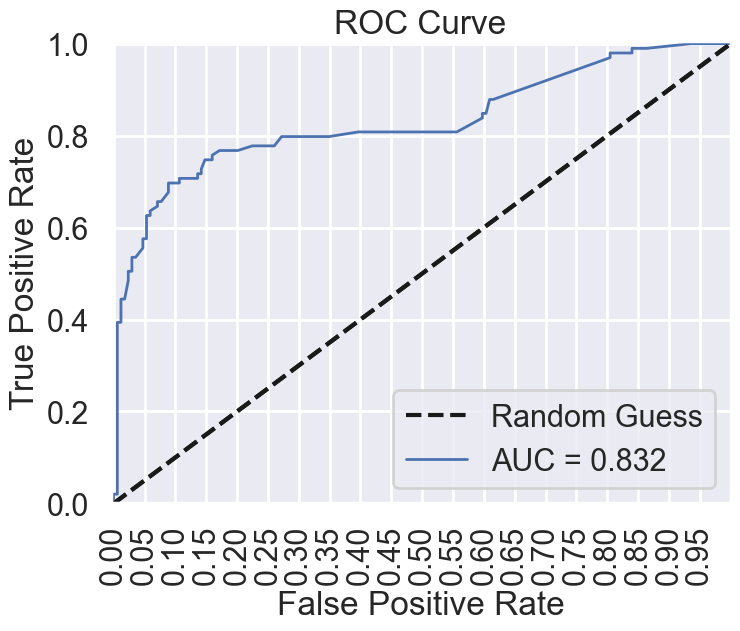

In [155]:
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

## Model Complexity

In [157]:
from sklearn.preprocessing import PolynomialFeatures
acc_train=[]
acc_test=[]

for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly= poly_reg.fit_transform(xtrain),poly_reg.fit_transform(xtest)
    
    lr_poly = LogisticRegression(random_state=25)
    lr_poly.fit(X_tr_poly, ytrain)
   
    y_tr_predicted,y_tst_predict = lr_poly.predict(X_tr_poly),lr_poly.predict(X_tst_poly)
   
    acc_train.append(accuracy_score(ytrain, y_tr_predicted))
    acc_test.append(accuracy_score(ytest, y_tst_predict))
    

C:\Users\root\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\root\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\root\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\root\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (st

<Axes: >

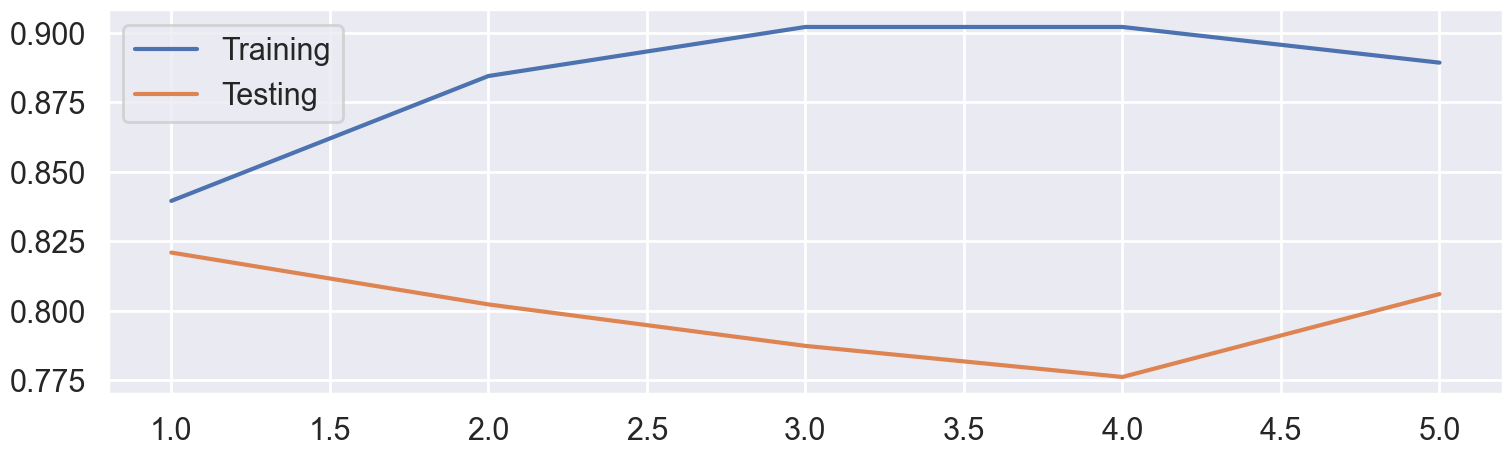

In [158]:
plt.figure(figsize=(18,5))
sns.set_context('poster')

sns.lineplot(x=list(range(1,6)), y=acc_train, label='Training')

sns.lineplot(x=list(range(1,6)), y=acc_test, label='Testing')

# Task 4: Submission on Kaggle

### Task 4: Import test data

In [173]:
#write code here
test = pd.read_csv('competition_clean.csv')
df_test = test.copy()
df_test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,892,3,male,0,0,Q,Mr,solo,0-10,32-48
1,893,3,female,1,0,S,Mrs,couple,0-10,32-48
2,894,2,male,0,0,Q,Mr,solo,0-10,48-64
3,895,3,male,0,0,S,Mr,solo,0-10,16-32
4,896,3,female,1,1,S,Mrs,group,10-25,16-32


In [175]:
df_test.shape

(418, 10)

# Task 5: Do One Hot encoding of test data

In [178]:
#write code here
df_OneHot=pd.get_dummies(df_test,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_OneHot = df_OneHot.astype(int)
df_test = df_OneHot.copy()
df_test.head()

,PassengerId,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,892,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,893,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,894,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,895,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,896,1,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


# Task 6: Separate Passenger ID for submission

In [181]:
#Write code here
PassengerID = df_test['PassengerId']
df_test.drop('PassengerId', axis=1, inplace=True)
df_test

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
414,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
415,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
416,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# Task 7: Do prediction through final model

In [184]:
#write code here
pred_final= lr_model.predict(df_test)

## Creating Data Frame for submission

In [187]:
submission=pd.DataFrame({'PassengerId':PassengerID,'Survived':pred_final})

In [ ]:
submission.head()

In [ ]:
submission.shape

# Task 8: Export the dataset into csv file

In [ ]:
# Write code here
submission.to_csv('my_submission v1.0.csv', index=False)